# Within-Cluster Sum of Squares (WCSS) or Inertia:

In [32]:

import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data
df = pd.read_csv("income.csv")
# List to store WCSS (Inertia) values
accuracy = []
scaler=MinMaxScaler()
df[['Income($)']]=scaler.fit_transform(df[['Income($)']])
df[['Age']]=scaler.fit_transform(df[['Age']])
# Loop over different numbers of clusters
for i in range( 1,7):
    KM = KMeans(n_clusters=i)
    KM.fit(df[['Age', 'Income($)']])
    df['cluster'] = KM.fit_predict(df[['Age', 'Income($)']])
    accuracy.append(KM.inertia_)

print("WCSS (Inertia) values for different clusters: ", accuracy)
optimal_clusters = accuracy.index(min(accuracy)) + 1
print(f"The optimal number of clusters is: {optimal_clusters}")


WCSS (Inertia) values for different clusters:  [5.434011511988179, 2.091136388699078, 0.4750783498553097, 0.38815291664787444, 0.3198981120367373, 0.22443334487241415]
The optimal number of clusters is: 6


[[0.1372549  0.11633428]
 [0.72268908 0.8974359 ]
 [0.85294118 0.2022792 ]]


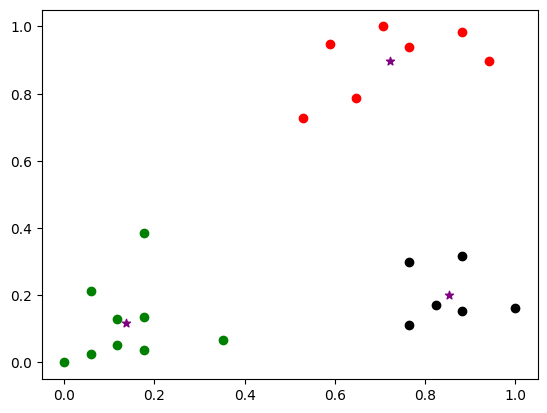

In [44]:
KM = KMeans(n_clusters=3)
KM.fit(df[['Age', 'Income($)']])
df['cluster'] = KM.fit_predict(df[['Age', 'Income($)']])
print(KM.cluster_centers_)
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(df4.Age,df4['Income($)'],color='blue')


plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

# Silhouette Score:



In [42]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load data
df = pd.read_csv("income.csv")

# Scaling the features
scaler = MinMaxScaler()
df[['Income($)']] = scaler.fit_transform(df[['Income($)']])
df[['Age']] = scaler.fit_transform(df[['Age']])

# List to store Silhouette Score values
accuracy = []

# Loop over different numbers of clusters
for i in range(2, 7):  # Start from 2 because Silhouette Score is not defined for 1 cluster
    KM = KMeans(n_clusters=i, random_state=42)
    fit = KM.fit(df[['Age', 'Income($)']])
    df['cluster'] = KM.fit_predict(df[['Age', 'Income($)']])
    
    # Calculate Silhouette Score and append it
    score = silhouette_score(df[['Age', 'Income($)']], KM.labels_)
    accuracy.append(score)

# Print Silhouette Score values
print("Silhouette Scores for different clusters: ", accuracy)

# Determine the number of clusters with the maximum Silhouette Score
optimal_clusters = accuracy.index(max(accuracy)) + 2  # +2 because the loop started at 2
print(f"The optimal number of clusters is: {optimal_clusters}")


Silhouette Scores for different clusters:  [np.float64(0.5305186573468941), np.float64(0.7129710183539274), np.float64(0.6136128946575949), np.float64(0.46631248804199604), np.float64(0.4578707399007253)]
The optimal number of clusters is: 3
